# AdaBoost + RandomForest via GridSearch

El set de training usado se genera desde `lucho/generar_set_test`

In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [4]:
RANDOM_SEED = 12

In [5]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv')

In [6]:
entrenamiento = entrenamiento.drop_duplicates()

no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000, random_state=RANDOM_SEED)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [7]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [8]:
TEST_SIZE_PERCENT = 0.1

In [9]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [10]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [11]:
clasificador = RandomForestClassifier(verbose=1, n_jobs=-1, random_state=RANDOM_SEED)
gs = GridSearchCV(clasificador, 
    {'min_samples_split': [10, 50, 100, 200, 500, 1000], 
     'criterion': ('gini', 'entropy'), 
     'max_features': ('sqrt', 'log2', 0.8, 0.5),
     'n_estimators': [2, 5, 10, 50]
    }, n_jobs=-1)

In [12]:
gs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.0min finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.4s finished
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   32.4s fin

KeyboardInterrupt: 

In [11]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2000,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [12]:
gs = GridSearchCV(clasificador, {'min_samples_split': [m for m in range(1500, 2500, 100)], 'criterion': ('gini', 'entropy'), }, n_jobs=-1)

In [13]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400], 'criterion': ('gini', 'entropy')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [16]:
gs.best_estimator_.score(X_test, y_test)

0.96658

In [20]:
clasificador = AdaBoostClassifier(
    random_state=RANDOM_SEED
)

gs = GridSearchCV(clasificador, 
    {'n_estimators': [m for m in range(10, 50, 10)], 
     'base_estimator': (
         DecisionTreeClassifier(
            min_samples_split=1000,
            criterion = 'entropy',
            random_state=RANDOM_SEED
         ), 
         DecisionTreeClassifier(
            min_samples_split=2200,
            criterion = 'gini',
            random_state=RANDOM_SEED
         )
     )
    }, 
    n_jobs=-1)

In [21]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=12),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40], 'base_estimator': (DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samp...        min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=12)

In [23]:
clasificador = gs.best_estimator_

In [24]:
clasificador.score(X_test, y_test)

0.96244

In [25]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [27]:
kaggle_set['sepostulo'] = y_kaggle

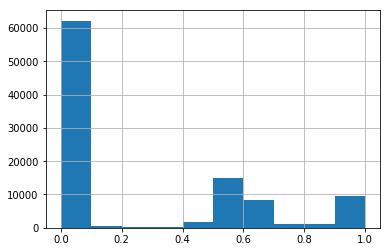

In [28]:
kaggle_set['sepostulo'].hist()

In [30]:
kaggle_set[['id', 'sepostulo']].to_csv('/home/luciano/orga-datos/tmp/submits/submit-47.csv', index=False)

In [ ]:
# kaggle score: 0.924